## Partie : Prediction basée sur les densité de nuance de gris

Ce notebook présente l'apprentissage d'un classifieur de fruits multiclasse avec un classifieur naif bayesin s'appuyant sur la loi de bernoulli.
Ce qui est important avec ce choix de modélisation, c'est qu'il faut que nos données soit binaire, c'est à dire 0/1, car c'est le critère de l'expérience de Bernouilli. Donc, dans cette partie nous allons étudier les performance d'un pre processing sur les images en transformant nos images en nuance de gris puis en récupérant la densité de couleur en fonction de deux hyper paramètres qui sont le nombre de bins et la valeur seuil $\alpha$ à partir duquel les valeurs sont binarisées et enfin nous appliquons un masque à ce dernier pour binariser les entrées

## Importation des bibliothèques

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
from skimage import io
import os
from tqdm import tqdm
from sklearn.utils import shuffle

## Importation des données

Nous avons extrait ces données depuis un dataset disponible sur kaggle à l'adresse suivante : https://www.kaggle.com/datasets/moltean/fruits

In [3]:
fruits = ["Banane","Mais","Fraise","Framboise","Clementine","Poire",
          "Nectarine","Orange","Lychee","Kiwi","Mirtille","Cerise",
          "Abricot","Citron","Melon","Tangelo","Plum","Peche","Kaki","Mangue"]

In [4]:
format_fichier = [".jpg"]

def lire_images(cheminRacine, array, y, index):   
    print(f"chargement {fruits[index]}")
    for lists in tqdm(os.listdir(cheminRacine)): 
        chemin = os.path.join(cheminRacine, lists) 
        filename, extension = os.path.splitext(chemin) 
        if extension in format_fichier:   
            array.append(mpimg.imread(chemin))
            y.append(index)
        if os.path.isdir(chemin): 
            lire_images(chemin, array, y, index)
images = []
classes = []

#remplissage de la liste d'images + classes
lire_images("../Training/Banana", images, classes, 0)
lire_images("../Training/Corn", images, classes, 1)
lire_images("../Training/Strawberry", images, classes, 2)
lire_images("../Training/Raspberry", images, classes, 3)
lire_images("../Training/Clementine", images, classes, 4)
lire_images("../Training/Pear Williams", images, classes, 5)
lire_images("../Training/Nectarine", images, classes, 6)
lire_images("../Training/Orange", images, classes, 7)
lire_images("../Training/Lychee", images, classes, 8)
lire_images("../Training/Kiwi", images, classes, 9)
lire_images("../Training/Blueberry", images, classes, 10)
lire_images("../Training/Cherry 1", images, classes, 11)
lire_images("../Training/Apricot", images, classes, 12)
lire_images("../Training/Lemon", images, classes, 13)
lire_images("../Training/Watermelon", images, classes, 14)
lire_images("../Training/Tangelo", images, classes, 15)
lire_images("../Training/Plum", images, classes, 16)
lire_images("../Training/Peach", images, classes, 17)
lire_images("../Training/Kaki", images, classes, 18)
lire_images("../Training/Mango", images, classes, 19)




K = len(fruits)

images,classes = shuffle(images, classes, random_state=10) 

chargement Banane


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 490/490 [00:01<00:00, 331.81it/s]


chargement Mais


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 450/450 [00:03<00:00, 145.50it/s]


chargement Fraise


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 492/492 [00:02<00:00, 242.59it/s]


chargement Framboise


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 490/490 [00:03<00:00, 123.72it/s]


chargement Clementine


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 490/490 [00:02<00:00, 168.23it/s]


chargement Poire


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 490/490 [00:02<00:00, 181.97it/s]


chargement Nectarine


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 492/492 [00:02<00:00, 210.02it/s]


chargement Orange


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 479/479 [00:01<00:00, 391.63it/s]


chargement Lychee


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 490/490 [00:03<00:00, 125.02it/s]


chargement Kiwi


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 466/466 [00:01<00:00, 397.47it/s]


chargement Mirtille


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 462/462 [00:02<00:00, 178.52it/s]


chargement Cerise


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 492/492 [00:02<00:00, 214.71it/s]


chargement Abricot


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 492/492 [00:01<00:00, 313.29it/s]


chargement Citron


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 492/492 [00:01<00:00, 333.34it/s]


chargement Melon


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 475/475 [00:01<00:00, 386.80it/s]


chargement Tangelo


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 490/490 [00:04<00:00, 113.21it/s]


chargement Plum


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 447/447 [00:02<00:00, 192.46it/s]


chargement Peche


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 492/492 [00:02<00:00, 217.82it/s]


chargement Kaki


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 490/490 [00:01<00:00, 460.05it/s]


chargement Mangue


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 490/490 [00:03<00:00, 153.32it/s]


In [5]:
images = np.asarray(images, dtype=int)
classes = np.asarray(classes, dtype=int)

print(images.shape)
print(classes.shape)
print(f"Nous avons au total {len(images)} images dans notre dataset en 50x50 avec 3 couleurs") 

(9651, 50, 50, 3)
(9651,)
Nous avons au total 9651 images dans notre dataset en 50x50 avec 3 couleurs


Voici une representation d'images de notre dataset :


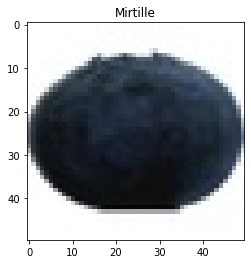

In [6]:
print("Voici une representation d'images de notre dataset :")
index_demo = 1
img_demo = images[index_demo]
plt.figure()
plt.imshow(img_demo)
plt.title(fruits[classes[index_demo]])
plt.show()

## Fonctions de préparation des données

In [11]:
def transformer_en_gris(img_orig):
    im = np.zeros((img_orig.shape[0],img_orig.shape[1])) # On fait une copie de l'original
    for i in range(img_orig.shape[0]):
        for j in range(img_orig.shape[1]):
            r, v, b = img_orig[i, j]
            moyenne = np.mean(img_orig[i, j])
            im[i, j] = int(moyenne)
    return im 

## Fonctions de preprocessing

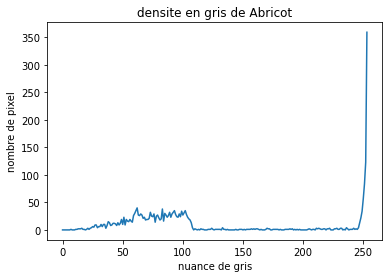

In [70]:
index_test = 5
image_test = images[index_test]
dens = histoPerImage(image_test,255)
plt.figure()
plt.title(f"densite en gris de {fruits[classes[index_test]]}")
plt.plot(dens)
plt.ylabel("nombre de pixel")
plt.xlabel("nuance de gris")
plt.show()

In [53]:
def histoPerImage(image,nbBins):
    NBbins = nbBins
    bins = np.linspace(0, 255, NBbins)
    image = transformer_en_gris(image)
    densiteGris, bin_trash = np.histogram(image.ravel(),bins)
    return densiteGris#[:-1] # SUPPRIME TOUT LES PIXELS BLANC

In [54]:
def constructionXByHistogramme(images, nbBins,Alpha): # /!\ nbBins >= 3 /!\ 
    X = np.zeros((np.shape(images)[0],nbBins - 1))
    for i in tqdm(range(np.shape(images)[0])):
        histo = histoPerImage(images[i],nbBins)
        histo = np.array(histo, dtype = np.float)
        histo /= histo.max()
        mask = (histo > Alpha)
        histo[mask] = 1
        histo[np.invert(mask)] = 0
        X[i] = histo
    return X

In [55]:
Alpha = 0.01
NbBins = 255
X = constructionXByHistogramme(images,NbBins,Alpha)
y = np.array(classes)

  0%|                                                                                                                                                                                                              | 0/9651 [00:00<?, ?it/s]C:\Users\jerem\AppData\Local\Temp\ipykernel_15840\2675002167.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  histo = np.array(histo, dtype = np.float)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9651/9651 [04:51<00:00, 33.05it/s]


In [56]:
print(X.shape)
print(y.shape)

(9651, 254)
(9651,)


In [57]:
Ntot   =  X.shape[0]
Ntrain = int(0.8 * Ntot)

X_train = X[:Ntrain]
X_test  = X[Ntrain:]
y_train = y[:Ntrain]
y_test  = y[Ntrain:]

In [58]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7720, 254)
(1931, 254)
(7720,)
(1931,)


## Modèle du bayesien naïf : representation sous forme de loi de Bernoulli

Pour contruire notre fonction de classification, on va représenter nos données sous forme binaire afin de pouvoir effectuer une expérience de Bernoulli dessus. C'est à dire que chaque dimension d'un exemple doit valoir soit 0 soit 1 afin qu'on puisse calculer ce type de probabilité :
$ P(X_d = x_d | \theta , y) = p_i^{x_d}*(1 - p_d)^{(1 - x_d)}$ ou $d$ représente une dimension, $p_d \in[0,1] $ la probabilité que cette dimension prenne la valeur $1$ , $y \in \{classe\}$ la classe, et $x_d \in \{0,1\}$ la valeur possible.

Pour construire notre classifieur, nous cherchons à choisir la probabilité maximum d'une classe par rapport a l'image et a des paramètres que l'on va apprendre. on écrit cela ainsi :
<p style="text-align: center;">
    $ y_{pred} = argmax_y P(y | x_i , \theta)$
</p>
Ou $i$ représente l'image $i$.

Notre fonction de prediction s'écrira donc : 
<p style="text-align: center;">
    $f_{\theta}(x_i) = argmax_y P(y | x_i , \theta)$
</p>
Pour calculer la quantité $P(y | x_i , \theta)$, nous allons passer par la loi de Bayes ($P(A,B) = P(A|B)P(B) = P(B|A)P(A) <=> P(A|B) = P(B|A)P(A)/P(B)$)

Ce qui nous donne : $P(y | x_i , \theta) = \frac{P(x_i | y , \theta) P(y)}{P(x_i)}$. De plus, on remarque que $P(x_i)$ est constant pour chaque classe, nous pouvons donc l'enlever de l'équation car le résultat sera proportionnel. \
On obtient : 
<p style="text-align: center;">
    $P(y | x_i , \theta) = P(x_i | y , \theta) P(y) $
</p>
La prior $P(y)$ est la probabilté qu'un exemple soit de la classe $y$ donc nous pouvons calculer cette quantité trivialement en comptant le nombre 
d'exemple de la classe puis en divisant par le nombre total d'exemples tel que.
<p style="text-align: center;">
    $P(y_j) = \frac{1}{N}\sum_{i}^{N} classe(x_i,y_j)$
</p>
Ou $N$ représente le nombre d'exemple du dataset et $classe(x_i)$ est une fonction indicatrice si $x_i$ est bien de la classe $y_i$

La vraissemblance des données par rapport aux classes et aux paramètres ce calcul de la manière suivante en faisant une hypothèse d'indépendance entre les dimensions sinon le calcul n'aura pas été faisable: 
<p style="text-align: center;">
    $ P(x_i | y_k , \theta) = \prod_{d}^{D} P(x_{i,d} | \theta)$
</p>
<p style="text-align: center;">
    $ = \prod_{d}^{D} p_{k,d}^{x_{i,d}}*(1 - p_{k,d})^{(1 - x_{i,d})}$
</p>
Nous voyons d'après cette équations que nous avons à trouver les valeurs de NbBinsx20 paramètres ($p_{k,d} \in \theta$).
20 : nombre de classe

En résumant les équations ci-dessus la fonction finale de prédiction s'écrit : 
<p style="text-align: center;">
    $f_{\theta}(x_i) = argmax_y  \prod_{d}^{D} p_{k,d}^{x_{i,d}}*(1 - p_{k,d})^{(1 - x_{i,d})} * \frac{1}{N}\sum_{i}^{N} classe(x_i,y_j) $
</p>

Nous avons à présent besoin de trouver les paramètres $p_{k,d}$ nécessaire à notre fonction de prédiction. Pour cela nous allons les estimés par la méthode du maximum de vraisemblance. Comme nous l'avons dit plutot la vraisemblance se définit par : $ L(x_i,\theta,y_k) = P(x_i | y_k , \theta) = \prod_{d}^{D} P(x_{i,d} | \theta)$ pour un exemple de la classe $k$. La vraisemblance d'un ensemble d'exemple pour la classe $k$ s'exprime par ($|y_k|$ représente le nombre d'exemple de la classe $k$) : 
<p style="text-align: center;">
$L(x,\theta,y_k) = \prod_{i}^{|y_k|} \prod_{d}^{D} P(x_{i,d} | \theta) $
</p>
<p style="text-align: center;">
$ = \prod_{i}^{|y|} \prod_{d}^{D} p_{k,d}^{x_{i,d}}*(1 - p_{k,d})^{(1 - x_{i,d})} $
</p>

Pour trouver les $p_{k,d}^{*}$, nous allons devoir dérivée cette expression afin de trouver l'optimum de cette fonction et d'isoler les $p_{k,d}$. Pour cela, nous allons d'abord calculer la log-vraissemblance pour faciliter les calculs ensuite (log(.) étant une fonction strictement croissante, cela ne fausse donc pas les calculs).
<p style="text-align: center;">
$ log L(x,\theta,y_k) = log \prod_{i}^{|y|} \prod_{d}^{D} p_{k,d}^{x_{i,d}}*(1 - p_{k,d})^{(1 - x_{i,d})} $
</p>
<p style="text-align: center;">
$ = \sum_{i}^{|y|} \sum_{d}^{D} log[ p_{k,d}^{x_{i,d}}*(1 - p_{k,d})^{(1 - x_{i,d})}] $ (log(a * b) = log(a) + log(b))
</p>
<p style="text-align: center;">
$ = \sum_{i}^{|y|} \sum_{d}^{D} x_{i,d}*log(p_{k,d}) + (1 - x_{i,d})*log(1 - p_{k,d}) $
</p>

Nous allons maintenant annuler la dérivé de cette expression par rapport aux $p_{k,d}$:

<p style="text-align: center;">
$ (log L(x,\theta,y_k))'(p_{k,d}) = \sum_{i}^{|y|} \frac{x_{i,d}}{p_{k,d}}-\frac{1 - x_{i,d}}{1 - p_{k,d}}  $ (d étant en indice on peut enlever la somme et dérivé de somme = somme des dérivées)
</p>

Isolons les $p_{k,d}$ en posant l'équations = 0.
<p style="text-align: center;">
$ (log L(x,\theta,y_k))'(p_{k,d}) = 0 $
</p>
<p style="text-align: center;">
$ \sum_{i}^{|y|} \frac{x_{i,d}}{p_{k,d}}-\frac{1 - x_{i,d}}{1 - p_{k,d}} = 0 $
</p>
<p style="text-align: center;">
$ \sum_{i}^{|y|} \frac{x_{i,d}(1 - p_{k,d}) - (1 - x_{i,d})*p_{k,d}}{p_{k,d}(1 - x_{i,d})} = 0 $
</p>
<p style="text-align: center;">
$ \sum_{i}^{|y|} x_{i,d}(1 - p_{k,d}) - (1 - x_{i,d})*p_{k,d} = 0 $
</p>
<p style="text-align: center;">
$ \sum_{i}^{|y|} x_{i,d} -x_{i,d}p_{k,d} -p_{k,d} + x_{i,d}p_{k,d}  = 0 $
</p>
<p style="text-align: center;">
$ \sum_{i}^{|y|} x_{i,d} -p_{k,d} = 0 $
</p>
<p style="text-align: center;">
$  |y| * p_{k,d}  = \sum_{i}^{|y|} x_{i,d} $
</p>
<p style="text-align: center;">
$   p_{k,d,*}  = \frac{1}{|y|}\sum_{i}^{|y|} x_{i,d} $
</p>

Après avoir calculer tous les $p_{k,d,*}$, la fonction de prédiction est :
<p style="text-align: center;">
    $f_{\theta}(x_i) = argmax_y  \prod_{d}^{D} p_{k,d,*}^{x_{i,d}}*(1 - p_{k,d,*})^{(1 - x_{i,d})} * \frac{1}{N}\sum_{i}^{N} classe(x_i,y_j) $
</p>


In [59]:
def BayesienNaif_fit(X,y):
    N = X.shape[0]
    D = X.shape[1]
    
    pkd = np.zeros((K,D))
    Pk = np.zeros((K,))
    
    for k in range(K):
        mask = (y == k)
        Pk[k] = np.sum(mask) / N
        
        Xk = X[mask]
        for d in range(D):
            count = 0
            for n in range(Xk.shape[0]):
                count += Xk[n , d]
            
            pkd[k , d] = count / Xk.shape[0]
    
    return pkd, Pk

## la fonction de dećision (a parametres fixés) ##
def BayesienNaif_predict(X,pkd, Pk):
    epsilon = 1e-8
    N = X.shape[0]
    D = X.shape[1]
    
    y_pred = np.zeros(N)
    
    for n in range(N):
        x = X[n]
        score = np.zeros(K)
        for k in range(K):
            score[k] = (
                np.log(Pk[k])
                +
                np.sum(
                x * np.log(pkd[k] + epsilon)
                    +
                (1 - x) * np.log(1 - pkd[k] + epsilon)
                )
            )
        k = np.argmax(score)
        y_pred[n] = k
    return y_pred

## Test du modèle

In [60]:
## Entrainement du modèle
pkd , Pk = BayesienNaif_fit(X_train, y_train)

## Résultat du modèle

In [61]:
y_pred_train = BayesienNaif_predict(X_train, pkd,Pk)
y_pred_test = BayesienNaif_predict(X_test, pkd,Pk)

In [62]:
print("Accuracy du modele en train: ",(np.sum(y_train == y_pred_train) / X_train.shape[0]) *100,"%")
print("Accuracy du modele en test: ",(np.sum(y_test == y_pred_test) / X_test.shape[0]) *100,"%")

Accuracy du modele en train:  78.48445595854923 %
Accuracy du modele en test:  79.02641118591404 %


## Variation des hyper-paramètres : 

In [64]:
list_alpha = [0.0001,0.001,0.005,0.01]
list_nbbins = [5,50,100,150,200,255]


mat_res_train = np.zeros((len(list_alpha) , len(list_nbbins)))
mat_res_test = np.zeros((len(list_alpha) , len(list_nbbins)))

for index_alpha in range(len(list_alpha)) :
    for index_nbbins in range(len(list_nbbins)) :
        alpha = list_alpha[index_alpha]
        nbbins = list_nbbins[index_nbbins]
        # pre process
        X = constructionXByHistogramme(images,nbbins,alpha)
        y = np.array(classes)
        Ntot   =  X.shape[0]
        Ntrain = int(0.8 * Ntot)
        X_train = X[:Ntrain]
        X_test  = X[Ntrain:]
        y_train = y[:Ntrain]
        y_test  = y[Ntrain:]
        # entrainement
        pkd , Pk = BayesienNaif_fit(X_train, y_train)
        # prediction
        y_pred_train = BayesienNaif_predict(X_train, pkd,Pk)
        y_pred_test = BayesienNaif_predict(X_test, pkd,Pk)
        # test
        acc_train = (np.sum(y_train == y_pred_train) / X_train.shape[0]) *100
        acc_test = (np.sum(y_test == y_pred_test) / X_test.shape[0]) *100
        
        mat_res_train[index_alpha , index_nbbins] = acc_train
        mat_res_test[index_alpha , index_nbbins] = acc_test
        print(f"alpha = {alpha} , nbbins = {nbbins}")
        print("Accuracy du modele en train: ",acc_train,"%")
        print("Accuracy du modele en test: ",acc_test,"%")

  0%|                                                                                                                                                                                                              | 0/9651 [00:00<?, ?it/s]C:\Users\jerem\AppData\Local\Temp\ipykernel_15840\2675002167.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  histo = np.array(histo, dtype = np.float)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9651/9651 [04:49<00:00, 33.36it/s]


alpha = 0.0001 , nbbins = 5
Accuracy du modele en train:  6.632124352331606 %
Accuracy du modele en test:  6.11082340756085 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9651/9651 [04:46<00:00, 33.70it/s]


alpha = 0.0001 , nbbins = 50
Accuracy du modele en train:  34.740932642487046 %
Accuracy du modele en test:  33.35059554634904 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9651/9651 [04:43<00:00, 34.01it/s]


alpha = 0.0001 , nbbins = 100
Accuracy du modele en train:  55.58290155440414 %
Accuracy du modele en test:  53.236664940445365 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9651/9651 [04:44<00:00, 33.97it/s]


alpha = 0.0001 , nbbins = 150
Accuracy du modele en train:  66.96891191709845 %
Accuracy du modele en test:  64.7332988089073 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9651/9651 [04:45<00:00, 33.76it/s]


alpha = 0.0001 , nbbins = 200
Accuracy du modele en train:  72.02072538860104 %
Accuracy du modele en test:  69.3423096841015 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9651/9651 [04:44<00:00, 33.89it/s]


alpha = 0.0001 , nbbins = 255
Accuracy du modele en train:  74.30051813471502 %
Accuracy du modele en test:  71.20662868979804 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9651/9651 [04:43<00:00, 34.03it/s]


alpha = 0.001 , nbbins = 5
Accuracy du modele en train:  7.629533678756477 %
Accuracy du modele en test:  7.146556188503367 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9651/9651 [04:29<00:00, 35.82it/s]


alpha = 0.001 , nbbins = 50
Accuracy du modele en train:  37.862694300518136 %
Accuracy du modele en test:  36.35422061108234 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9651/9651 [04:30<00:00, 35.73it/s]


alpha = 0.001 , nbbins = 100
Accuracy du modele en train:  58.5621761658031 %
Accuracy du modele en test:  56.39564992232005 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9651/9651 [04:29<00:00, 35.87it/s]


alpha = 0.001 , nbbins = 150
Accuracy du modele en train:  68.35492227979275 %
Accuracy du modele en test:  65.66545831175557 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9651/9651 [04:29<00:00, 35.87it/s]


alpha = 0.001 , nbbins = 200
Accuracy du modele en train:  73.08290155440415 %
Accuracy du modele en test:  70.06732263076127 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9651/9651 [04:33<00:00, 35.30it/s]


alpha = 0.001 , nbbins = 255
Accuracy du modele en train:  75.12953367875647 %
Accuracy du modele en test:  71.82806835836354 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9651/9651 [04:43<00:00, 33.99it/s]


alpha = 0.005 , nbbins = 5
Accuracy du modele en train:  9.572538860103627 %
Accuracy du modele en test:  8.493008803728639 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9651/9651 [04:37<00:00, 34.79it/s]


alpha = 0.005 , nbbins = 50
Accuracy du modele en train:  59.028497409326434 %
Accuracy du modele en test:  57.32780942516831 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9651/9651 [04:33<00:00, 35.26it/s]


alpha = 0.005 , nbbins = 100
Accuracy du modele en train:  71.47668393782384 %
Accuracy du modele en test:  69.44588296219575 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9651/9651 [04:45<00:00, 33.80it/s]


alpha = 0.005 , nbbins = 150
Accuracy du modele en train:  75.64766839378238 %
Accuracy du modele en test:  73.69238736406007 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9651/9651 [04:51<00:00, 33.15it/s]


alpha = 0.005 , nbbins = 200
Accuracy du modele en train:  78.38082901554404 %
Accuracy du modele en test:  76.38529259451062 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9651/9651 [04:53<00:00, 32.90it/s]


alpha = 0.005 , nbbins = 255
Accuracy du modele en train:  79.49481865284974 %
Accuracy du modele en test:  78.09425168306578 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9651/9651 [04:46<00:00, 33.68it/s]


alpha = 0.01 , nbbins = 5
Accuracy du modele en train:  10.22020725388601 %
Accuracy du modele en test:  9.47695494562403 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9651/9651 [04:53<00:00, 32.88it/s]


alpha = 0.01 , nbbins = 50
Accuracy du modele en train:  66.72279792746114 %
Accuracy du modele en test:  65.09580528223718 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9651/9651 [05:00<00:00, 32.15it/s]


alpha = 0.01 , nbbins = 100
Accuracy du modele en train:  76.73575129533678 %
Accuracy du modele en test:  76.43707923355775 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9651/9651 [04:54<00:00, 32.82it/s]


alpha = 0.01 , nbbins = 150
Accuracy du modele en train:  79.01554404145078 %
Accuracy du modele en test:  78.71569135163128 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9651/9651 [04:51<00:00, 33.11it/s]


alpha = 0.01 , nbbins = 200
Accuracy du modele en train:  80.11658031088082 %
Accuracy du modele en test:  79.7514241325738 %


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9651/9651 [04:45<00:00, 33.76it/s]


alpha = 0.01 , nbbins = 255
Accuracy du modele en train:  78.48445595854923 %
Accuracy du modele en test:  79.02641118591404 %


Nous constatons que les meilleurs paramètres sont : 
- $\alpha = 0.01$
- $nbbins = 200$

## Conclusion

Nous voyons que ce modèle de prédiction basé sur un classifieur naif bayesien réussi à obtenir un bon score de prédiction en entrainement et en test correct mais qui est toutefois moins bon que le pre processing par pixel. Cette approche requiert aussi moins de parametres à apprendre au maximum : 255x20 = 5080 paramètres.